<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
def information(df):
    print('Вывод таблицы')
    display(df.head())
    print('')
    print('Просмотр инфомации')
    print(df.info())
    print('')
    print('Статистика')
    display(df.describe())
    print('Пропуски')
    print(df.isna().sum())
    print('')
    print('Дубликаты')
    print(df.duplicated().sum())
    print('')
    sns.heatmap(df.corr(), annot=True, vmin = -1, vmax = 1, cmap= 'coolwarm')
    plt.title('Матрица корреляции')
    plt.show()  

Вывод таблицы


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0



Просмотр инфомации
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None

Статистика


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Пропуски
Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

Дубликаты
153



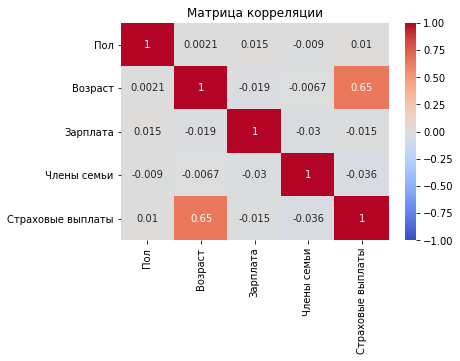

In [4]:
information(df)

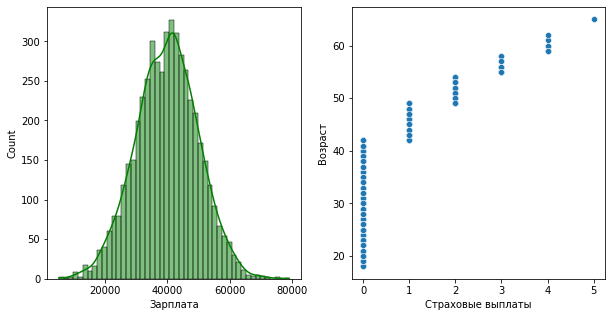

In [5]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1 = sns.histplot(df['Зарплата'], kde=True, color = 'green')
ax2 = plt.subplot(1,2,2)
ax2 = sns.scatterplot(data = df, x = df['Страховые выплаты'], y = df['Возраст'])
plt.show()

# Вывод:
1. Нам представлена таблица, состоящая из 5000 строк и 5 столбцов, из которых 3 типа int и 2 типа float. Пропусков не обнаружено
2. Было выявлено 153 дубликата, которые впоследствии были удалены.
3. Присутствует средняя связь (0,65) между признаком **Возраст** и целевым признаком **Страховые выплаты**
4. Распределение признака **Зарплата** нормальное с медианой и средним в районе 40000, что говорит нам о том, что нет каких-либо сильных выбросов

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Свойства матриц, которые могут нам понадобится для дальнейшего доказательства:

_Ассоциативный (сочетательный) закон умножения:_
 
 $ A(BС) = (АВ)С$
 
_Свойства операции транспонирования матриц:_  
 
1.$(A^T)^T = A$   
2.$(A+B)^T = B^T+A^T$  
3.$(AB)^T = B^TA^T$  

_Свойства обратной матрицы:_  

1.$(AB)^{−1}=B^{−1}A^{−1}$  
2.$(A^T)^{−1}=(A^{−1})^T$  
3.$(kA)^{−1}=k^{−1}A^{−1}$  

**Ответ:** Качество линейной регрессии не изменится, если ее признаки умножить на обратимую матрицу

**Обоснование:** 
Примем Х за XP, где P - это обратимая матрица.  
Тогда:  $w_{XP} = ((XP)^T(XP))^{-1}(XP)^{-1}y = $  
$ = (P^TX^TXP)^{-1}X^TX^Ty = $  
$ = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty =$   
$ = P^{-1}(X^TX)^{-1}X^Ty$  
или $P^{-1}w$    
Тогда:
$a_{XP} = XPP^{-1}w = Xw$ 

## Алгоритм преобразования

**Алгоритм**

Преобразуем признаки описанным выше способом, т.е. перемножим их на обратимую матрицу. 
1. Сгенерируем матрицу 4х4 (т.к. 4 столбца в таблице с признаками)
2. Преобразуем в обратную
3. Перемножим их
4. Проверим результат

**Обоснование**

Создадим матрицу 4х4

In [6]:
matrix = np.random.sample((4,4))
matrix

array([[0.4885483 , 0.02863222, 0.51892642, 0.3406231 ],
       [0.26508587, 0.48974606, 0.42380699, 0.91129237],
       [0.34817993, 0.318543  , 0.47990042, 0.46941181],
       [0.24787067, 0.09232926, 0.03715191, 0.78794946]])

In [7]:
def rnd_matrix(n):
    random_matrix = np.random.normal(size=(n, n))
    try:
        np.linalg.inv(random_matrix) 
    except LinAlgError: 
        rnd_matrix(n)
    return random_matrix

In [18]:
matrix2 = rnd_matrix(4)
matrix2

array([[-0.152708  ,  1.47537867, -0.40696817,  1.30051537],
       [ 0.37603091, -0.95156099, -1.21155686, -1.97471359],
       [-0.11471848,  1.9338461 , -0.58285964, -0.78138758],
       [ 1.98341784,  1.25656616,  0.94817329,  1.98537881]])

In [19]:
matrix2 @ inv(matrix2)

array([[ 1.00000000e+00,  2.51892121e-17, -7.97057125e-17,
        -1.28078984e-18],
       [ 1.64239891e-16,  1.00000000e+00, -2.07969351e-16,
         6.39224436e-18],
       [ 7.31026364e-17,  9.71203844e-17,  1.00000000e+00,
        -6.40285556e-18],
       [-8.83831322e-17, -3.46618432e-17, -1.00440424e-16,
         1.00000000e+00]])

<b> Спасибо за функцию, поправила и для себя сделала проверку </b>

Получим обратную ей при помощи функции numpy.linalg.inv()

In [8]:
inv_matrix = inv(matrix)
inv_matrix

array([[ -5.40490406,  -9.93021406,  14.19881999,   5.36236137],
       [ -6.22003613,  -5.31956837,  11.25843369,   2.13405611],
       [  5.94838859,   7.41218586, -10.51646111,  -4.87883572],
       [  2.14863339,   3.3976592 ,  -5.28999312,  -0.4377817 ]])

Перемножим их и проверим результат. Согласно формуле $AA^{-1} = A^{-1}A = E$ , у нас должна получиться единичная матрица

In [9]:
matrix @ inv_matrix

array([[ 1.00000000e+00, -4.34417062e-16,  1.88378335e-16,
         4.63679623e-17],
       [ 4.02407896e-16,  1.00000000e+00,  1.84323990e-15,
        -2.30909908e-17],
       [ 4.40475074e-17, -6.10284368e-16,  1.00000000e+00,
         1.00708806e-16],
       [ 2.62709149e-16,  4.43943094e-16,  5.13735131e-16,
         1.00000000e+00]])

Сошлось, генеральная диагональ состоит из единиц, остальные значания близки к нулю

## Проверка алгоритма

In [10]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

In [11]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.25, random_state=42)
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(3750, 4)
(3750,)
(1250, 4)
(1250,)


In [12]:
encod_features_train = features_train @ matrix
encod_features_test = features_test @ matrix
print(encod_features_train.shape)
print(encod_features_test.shape)

(3750, 4)
(1250, 4)


In [21]:
encod_features_train

,0,1,2,3
4884,14005.845934,12822.080030,19306.406418,18901.338521
3163,11600.736372,10618.838442,15990.468779,15653.160797
490,15189.657681,13905.126236,20938.067855,20497.338660
862,12057.304940,11039.339675,16620.367745,16275.583568
1740,14285.167917,13077.986253,19691.211522,19279.478500
...,...,...,...,...
4426,12646.542740,11575.567900,17431.573738,17064.347370
466,8957.715537,8202.993749,12347.537942,12096.319898
3092,16200.928357,14830.888557,22331.993234,21862.618688
3772,12508.895715,11451.884009,17242.929722,16882.297088


In [13]:
model = LinearRegression()
model.fit(features_train, target_train)
prediction = model.predict(features_test)
r2 = r2_score(target_test, prediction)
print(f"Значение r2: {r2:.10f}")

Значение r2: 0.4254778541


In [14]:
model_encod = LinearRegression()
model_encod.fit(encod_features_train, target_train)
prediction_encod = model_encod.predict(encod_features_test)
r2_encod = r2_score(target_test, prediction_encod)
print(f"Значение r2: {r2_encod:.10f}")

Значение r2: 0.4254778541


# Вывод:
Коэффициент детерминации (r2) у модели с исходными признаками и модели с признаками, умножененными на обратитмую матрицу одинаковые.